참고문헌

- 파이썬 딥러닝 파이토치 (이경택, 방심수, 안상준 지음), 정보문화사

- https://gaussian37.github.io/dl-pytorch-snippets/

- 2023 KAIA 한국인공지능학회 / Introduction to pytorch (Hyunchul Kim) / 링크 : https://www.youtube.com/watch?v=YX-AgT-Kovg

- PyTorch로 시작하는 딥 러닝 입문 (유원준, 안상준 지음), 링크 : https://wikidocs.net/book/2788

# 3. Softmax regression (Multinomial logistic regression)

- 다중 클래스 분류(Multi-Class classification)를 풀기 위한 Softmax regression 모형을 PyTorch를 이용하여 구현해보자.

## 1) 원-핫 인코딩(One-Hot Encoding)

### 1-1) One-hot encoding이란?

- 원-핫 인코딩은 선택해야 하는 선택지의 개수만큼의 차원을 가지면서, 각 선택지의 인덱스에 해당하는 원소에는 1, 나머지 원소는 0의 값을 가지도록 하는 표현 방법입니다.

- 예를 들어 강아지, 고양이, 냉장고라는 3개의 선택지가 있다고 해보겠습니다.
- 원-핫 인코딩을 하기 위해서는 우선 각 선택지에 순차적으로 정수 인덱스를 부여합니다.
- 임의로 강아지는 0번 인덱스, 고양이는 1번 인덱스, 냉장고는 2번 인덱스를 부여하였다고 해봅시다.  
- 이때 각 선택지에 대해서 원-핫 인코딩이 된 벡터는 다음과 같습니다.
\begin{equation} \begin{split} \text{강아지} & = [1,0,0] \\ \text{고양이} & = [0,1,0] \\ \text{냉장고} & = [0,0,1] \\ \end{split} \end{equation}

- 총 선택지는 3개였으므로 위 벡터들은 전부 3차원의 벡터가 되었습니다.
- 그리고 각 선택지의 벡터들을 보면 해당 선택지의 인덱스에만 1의 값을 가지고, 나머지 원소들은 0의 값을 가집니다.
- 예를 들어 고양이는 1번 인덱스였으므로 원-핫 인코딩으로 얻은 벡터에서 1번 인덱스만 1의 값을 가지는 것을 볼 수 있습니다.
- 이와 같이 원-핫 인코딩으로 표현된 벡터를 **원-핫 벡터(one-hot vector)**라고 합니다.

### 1-2) 원-핫 벡터의 무작위성

- 꼭 실제값을 원-핫 벡터로 표현해야만 다중 클래스 분류 문제를 풀 수 있는 것은 아니지만, 대부분의 다중 클래스 분류 문제가 각 클래스 간의 관계가 균등하다는 점에서 원-핫 벡터는 이러한 점을 표현할 수 있는 적절한 표현 방법입니다.

- 다수의 클래스를 분류하는 문제에서는 이진 분류처럼 2개의 숫자 레이블이 아니라 클래스의 개수만큼 숫자 레이블이 필요합니다.

- 이때 직관적으로 생각해볼 수 있는 레이블링 방법은 분류해야 할 클래스 전체에 정수 인코딩을 하는 겁니다.
- 예를 들어서 분류해야 할 레이블이 {red, green, blue}와 같이 3개라면 각각 0, 1, 2로 레이블을 합니다.

- 그런데 일반적인 다중 클래스 분류 문제에서 레이블링 방법으로는 위와 같은 정수 인코딩이 아니라 원-핫 인코딩을 사용하는 것이 보다 클래스의 성질을 잘 표현하였다고 할 수 있습니다.

- 그 이유는 다음과 같습니다.

- Banana, Tomato, Apple라는 3개의 클래스가 존재하는 문제가 있다고 해봅시다.
- 레이블은 정수 인코딩을 사용하여 각각 1, 2, 3을 부여하였습니다.
- 손실 함수로 선형 회귀 챕터에서 배운 평균 제곱 오차 MSE를 사용하면 정수 인코딩이 어떤 오해를 불러일으킬 수 있는지 확인할 수 있습니다. $$ Loss = {1 \over n} \sum_{i=1}^{n}{(y_i - \hat{y}_i)^2} $$
  + 앞서 선형 회귀에서 배웠던 MSE를 다시 그대로 가져온 것
  + $\hat{y}$는 예측값을 의미
- 직관적인 오차 크기 비교를 위해 평균을 구하는 수식은 제외하고 제곱 오차로만 판단해봅시다.
- 먼저 정수 인코딩의 경우,
  + 실제값이 Tomato일때 예측값이 Banana이었다면 제곱 오차는 다음과 같습니다. $$ (2-1)^2 = 1 $$
  + 실제값이 Apple일때 예측값이 Banana이었다면 제곱 오차는 다음과 같습니다. $$ (3-1)^2=4 $$
  + 즉, Banana과 Tomato 사이의 오차보다 Banana과 Apple의 오차가 더 큽니다.
  + 이는 기계에게 Banana가 Apple보다는 Tomato에 더 가깝다는 정보를 주는 것이며 이는 이는 사용자가 부여하고자 했던 정보가 아닙니다.

- 반면, 원-핫 인코딩을 통해서 레이블을 인코딩했을 때, 다음과 같이 각 클래스 간의 제곱 오차가 균등합니다. $$ ((1,0,0) - (0,1,0))^2 = 2 $$ $$ ((1,0,0) - (0,0,1))^2 = 2 $$
  + 다르게 표현하면 모든 클래스에 대해서 원-핫 인코딩을 통해 얻은 원-핫 벡터들은 모든 쌍에 대해서 유클리드 거리를 구해도 전부 유클리드 거리가 동일합니다.
  + 원-핫 벡터는 이처럼 각 클래스의 표현 방법이 무작위성을 가진다는 점을 표현할 수 있습니다.
  + 다만, 이러한 원-핫 벡터의 관계의 무작위성은 때로는 단어의 유사성을 구할 수 없다는 단점으로 언급되기도 합니다.

- 정수 인코딩의 순서 정보가 도움이 되는 분류 문제도 물론 있습니다.
  + 바로 각 클래스가 순서의 의미를 갖고 있어서 회귀를 통해서 분류 문제를 풀 수 있는 경우입니다.
  + 예를 들어 {baby, child, adolescent, adult}나 {1층, 2층, 3층, 4층}이나 {10대, 20대, 30대, 40대}와 같은 경우
  + 지만 일반적인 분류 문제에서는 각 클래스는 순서의 의미를 갖고 있지 않으므로 각 클래스 간의 오차는 균등한 것이 옳습니다.
  + 정수 인코딩과 달리 원-핫 인코딩은 분류 문제 모든 클래스 간의 관계를 균등하게 분배합니다.



## 2) 소프트맥스 회귀(Softmax Regression) 이해하기

- 소프트맥스 회귀를 통해 3개 이상의 선택지 중에서 1개를 고르는 다중 클래스 분류(Multi-Class Classification)를 실습해봅시다.

### 2-1) 다중 클래스 분류(Multi-class Classification)

- 이진 분류가 두 개의 답 중 하나를 고르는 문제였다면, 세 개 이상의 답 중 하나를 고르는 문제를 다중 클래스 분류(Multi-class Classification)라고 합니다.

- 아래의 문제는 꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이라는 4개의 특성(feature)로부터 setosa, versicolor, virginica라는 3개의 붓꽃 품종 중 어떤 품종인지를 예측하는 문제로 전형적인 다중 클래스 분류 문제입니다.

<img src='https://drive.google.com/uc?export=download&id=1qthNqz5OhbNDkRay32hsBpNPYbdZ40Qr' width="" height ="" /><br>

- 위 붓꽃 품종 분류하기 문제를 어떻게 풀지 고민하기 위해 앞서 배운 로지스틱 회귀의 이진 분류를 복습해보겠습니다.

- 이번 챕터의 설명에서 입력은 $X$, 가중치는 $W$, 편향은 $B$, 출력은 $\hat{Y}$로 각 변수는 벡터 또는 행렬로 가정합니다.
  + $\hat{Y}$는 예측값이라는 의미를 가지고 있으므로 가설식에서 $H(X)$대신 사용되기도 합니다.


#### 2-1-1) 로지스틱 회귀

- 로지스틱 회귀에서 시그모이드 함수는 예측값을 0과 1 사이의 값으로 만듭니다.
  + 예를 들어 스팸 메일 분류기를 로지스틱 회귀로 구현하였을 때, 출력이 0.75이라면 이는 이메일이 스팸일 확률이 75%라는 의미가 됩니다.
  + 반대로, 스팸 메일이 아닐 확률은 25%가 됩니다.
  + 이 두 확률의 총 합은 1입니다.

<img src='https://drive.google.com/uc?export=download&id=1k8xX07TvBG03x9f4_zq8nppSVB-1vxrx' width="" height ="" /><br>

#### 2-1-2) 소프트맥스 회귀

- 소프트맥스 회귀는 확률의 총 합이 1이 되는 이 아이디어를 다중 클래스 분류 문제에 적용합니다.
- 소프트맥스 회귀는 각 클래스. 즉, 각 선택지마다 소수 확률을 할당합니다.
- 이때 총 확률의 합은 1이 되어야 합니다.
- 이렇게 되면 각 선택지가 정답일 확률로 표현됩니다.

<img src='https://drive.google.com/uc?export=download&id=1K4_iXDVaG0ozT-6qmcnG8CkbLIrPxc6t' width="" height ="" /><br>

- 결국 소프트맥스 회귀는 선택지의 개수만큼의 차원을 가지는 벡터를 만들고, 해당 벡터가 벡터의 모든 원소의 합이 1이 되도록 원소들의 값을 변환시키는 어떤 함수를 지나게 만들어야 합니다.
- 위의 그림은 붓꽃 품종 분류하기 문제 등과 같이 선택지의 개수가 3개일때, 3차원 벡터가 어떤 함수 ?를 지나 원소의 총 합이 1이 되도록 원소들의 값이 변환되는 모습을 보여줍니다.
- 이 함수를 소프트맥스(softmax) 함수라고 합니다.

$$ \text{가설 : } H(X) = softmax(WX+B) $$

### 2-2) 소프트맥스 함수(Softmax function)

- 소프트맥스 함수는 분류해야하는 정답지(클래스)의 총 개수를 k라고 할 때, k차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정합니다.

- 우선 수식에 대해 설명하고, 그 후에는 그림으로 이해해보겠습니다.

#### 2-2-1) 소프트맥스 함수의 이해

- k차원의 벡터에서 i번째 원소를 $z_i$, i번째 클래스가 정답일 확률을 $p_i$로 나타낸다고 하였을 때 소프트맥스 함수는 $p_i$를 다음과 같이 정의합니다. $$ p_i = {e^{z_i} \over \sum_{j=1}^{k}{e^{z_j}}} \text{ for } i=1,2,\dots , k $$

- 위에서 풀어야하는 문제의 경우 k=3이므로 3차원 벡터 $z=[z_1, z_2, z_3]$  입력을 받으면 소프트맥스 함수는 아래와 같은 출력을 리턴합니다. $$ softmax(z) = \left[  {e^{z_1} \over \sum_{j=1}^{3}{e^{z_j}}}, {e^{z_2} \over \sum_{j=1}^{3}{e^{z_j}}}, {e^{z_3} \over \sum_{j=1}^{3}{e^{z_j}}} \right] = [p_1,p_2,p_3] = \hat{y} = \text{예측값} $$
  + $p_1$, $p_2$, $p_3$ 각각은 1번 클래스가 정답일 확률, 2번 클래스가 정답일 확률, 3번 클래스가 정답일 확률을 나타내며 각각 0과 1사이의 값으로 총 합은 1이 됩니다.

#### 2-2-2) 그림을 통한 이해

<img src='https://drive.google.com/uc?export=download&id=1of8wKJn8_1J9XuWbpLDLhXeNLJ1xZ8fx' width="" height ="" /><br>

- 위의 그림에 점차 살을 붙여봅시다.
- 여기서는 샘플 데이터를 1개씩 입력으로 받아 처리한다고 가정해봅시다. 즉, 배치 크기가 1입니다.

- 위의 그림에는 두 가지 질문이 있습니다. 첫번째 질문은 소프트맥스 함수의 입력에 대한 질문입니다.
- 하나의 샘플 데이터는 4개의 독립 변수 $x$를 가지는데 이는 모델이 4차원 벡터를 입력으로 받음을 의미합니다.
- 그런데 소프트맥스의 함수의 입력으로 사용되는 벡터는 벡터의 차원이 분류하고자 하는 클래스의 개수가 되어야 하므로 어떤 가중치 연산을 통해 3차원 벡터로 변환되어야 합니다. - 위의 그림에서는 소프트맥스 함수의 입력으로 사용되는 3차원 벡터를 $z$ 로 표현하였습니다.

<img src='https://drive.google.com/uc?export=download&id=1yi9lropo3ndq21uO_72RkzmlLuEgq6e1' width="" height ="" /><br>

- 샘플 데이터 벡터를 소프트맥스 함수의 입력 벡터로 차원을 축소하는 방법은 간단합니다. - 소프트맥스 함수의 입력 벡터 $z$의 차원수만큼 결과값의 나오도록 가중치 곱을 진행합니다.
- 위의 그림에서 화살표는 총 12개 $(4 × 3 = 12)$ 이며 전부 다른 가중치를 가지고, 학습 과정에서 점차적으로 오차를 최소화하는 가중치로 값이 변경됩니다.

<br>

- 두번째 질문은 오차 계산 방법에 대한 질문입니다.
- 소프트맥스 함수의 출력은 분류하고자하는 클래스의 개수만큼 차원을 가지는 벡터로 각 원소는 0과 1사이의 값을 가집니다.
- 이 각각은 특정 클래스가 정답일 확률을 나타냅니다. 여기서는 첫번째 원소인 $p_1$은 virginica가 정답일 확률, 두번째 원소인 $p_2$는 setosa가 정답일 확률, 세번째 원소인
$p_3$은 versicolor가 정답일 확률로 고려하고자 합니다.
- 그렇다면 이 예측값과 비교를 할 수 있는 실제값의 표현 방법이 있어야 합니다. - 소프트맥스 회귀에서는 실제값을 원-핫 벡터로 표현합니다.

<img src='https://drive.google.com/uc?export=download&id=1tICrvkCl27x3G8JKHyi-dtnBcnpY56zZ' width="" height ="" /><br>

- 위의 그림은 소프트맥스 함수의 출력 벡터의 첫번째 원소 $p_1$가 virginica가 정답일 확률, 두번째 원소 $p_2$가 setosa가 정답일 확률, 세번째 원소 $p_3$가 versicolor가 정답일 확률을 의미한다고 하였을 때, 각 실제값의 정수 인코딩은 1, 2, 3이 되고 이에 원-핫 인코딩을 수행하여 실제값을 원-핫 벡터로 수치화한 것을 보여줍니다.

<img src='https://drive.google.com/uc?export=download&id=1ioQpeKf3fCXJzErgu3RPN5xDjXqhIE86' width="" height ="" /><br>

- 예를 들어 현재 풀고 있는 샘플 데이터의 실제값이 setosa라면 setosa의 원-핫 벡터는 $[0 1 0]$입니다.

- 이 경우, 예측값과 실제값의 오차가 0이 되는 경우는 소프트맥스 함수의 결과가 $[0 1 0]$이 되는 경우입니다.

- 이 두 벡터의 오차를 계산하기 위해서 소프트맥스 회귀는 비용 함수로 크로스 엔트로피 함수를 사용하는데, 이는 뒤에서 비용 함수를 설명하는 부분에서 다시 언급하겠습니다.

<img src='https://drive.google.com/uc?export=download&id=1-CdKajjtRp2hqLPIOqg9HOTJud2B3vnL' width="" height ="" /><br>

- 이제 앞서 배운 선형 회귀나 로지스틱 회귀와 마찬가지로 오차로부터 가중치를 업데이트 합니다.

<img src='https://drive.google.com/uc?export=download&id=1U5Fj_Sb8d-IGiE6OPWtWIEZMCd6VLTU1' width="" height ="" /><br>

- 더 정확히는 선형 회귀나 로지스틱 회귀와 마찬가지로 편향 또한 업데이트의 대상이 되는 매개 변수입니다.
- 소프트맥스 회귀를 벡터와 행렬 연산으로 이해해봅시다. 입력을 특성(feature)의 수만큼의 차원을 가진 입력 벡터 $x$라고 하고, 가중치 행렬을 $W$, 편향을 $b$라고 하였을 때, 소프트맥스 회귀에서 예측값을 구하는 과정을 벡터와 행렬 연산으로 표현하면 아래와 같습니다.

<img src='https://drive.google.com/uc?export=download&id=1FnrVUYsB5rLV5VPN3kzIsjfvRXYj0lC3' width="" height ="" /><br>

- 여기서 $f$는 특성의 수이며 $c$는 클래스의 개수에 해당됩니다.


### 2-3) 붓꽃 품종 분류하기 행렬 연산으로 이해하기

- 위의 붓꽃 품종 분류 문제의 가설식을 행렬 연산으로 표현해보겠습니다.
- 우선 위의 예제의 데이터는 전체 샘플의 개수가 5개, 특성이 4개이므로 5 × 4 행렬
로 정의합니다. $$ X=\begin{bmatrix} 5.1 & 3.5 & 1.4 & 0.2 \\ 4.9 & 3.0 & 1.4 & 0.2 \\ 5.8 & 2.6 & 4.0 & 1.2 \\ 6.7 & 3.0 & 5.2 & 2.3 \\ 5.6 & 2.8 & 4.9 & 2.0 \end{bmatrix} $$

- 편의를 위해 각 행렬의 원소 위치를 반영한 변수로 표현하겠습니다.
$$ X=\begin{bmatrix} x_{11} & x_{12} & x_{13} & x_{14} \\ x_{21} & x_{22} & x_{23} & x_{24} \\ x_{31} & x_{32} & x_{33} & x_{34} \\ x_{41} & x_{42} & x_{43} & x_{44} \\ x_{51} & x_{52} & x_{53} & x_{54} \end{bmatrix} $$

- 이번 문제는 선택지가 총 3개인 문제이므로 가설의 예측값으로 얻는 행렬 $\hat{Y}$ 의 열의 개수는 3개여야 합니다.
- 그리고 각 행은 행렬 $X$의 각 행의 예측값이므로 행의 크기는 동일해야 합니다. - 결과적으로 행렬 $\hat{Y}$의 크기는 5 × 3입니다.
$$ \hat{Y} = \begin{bmatrix} y_{11} & y_{12} & y_{13} \\ y_{21} & y_{22} & y_{23} \\ y_{31} & y_{32} & y_{33} \\ y_{41} & y_{42} & y_{43} \\ y_{51} & y_{52} & y_{53} \\ \end{bmatrix} $$

- 크기 5 × 3의 행렬 $\hat{Y}$는 크기 5 × 4 입력 행렬 $X$과 가중치 행렬 $W$의 곱으로 얻어지는 행렬이므로 가중치 행렬 $W$ 의 크기는 추정을 통해 4 × 3의 크기를 가진 행렬임을 알 수 있습니다.
$$ W = \begin{bmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \\ w_{31} & w_{32} & w_{33} \\ w_{41} & w_{42} & w_{43} \\ \end{bmatrix} $$

- 편향 행렬 $B$는 예측값 행렬 $\hat{Y}$와 크기가 동일해야 하므로 5 × 3의 크기를 가집니다.
$$ B = \begin{bmatrix} b_1 & b_2 & b_3 \\ b_1 & b_2 & b_3 \\ b_1 & b_2 & b_3 \\ b_1 & b_2 & b_3 \\ b_1 & b_2 & b_3 \\ \end{bmatrix} $$

- 결과적으로 가설식은 다음과 같습니다. $$ \hat{Y} = softmax(WX + B) $$ $$ \begin{bmatrix} y_{11} & y_{12} & y_{13} \\ y_{21} & y_{22} & y_{23} \\ y_{31} & y_{32} & y_{33} \\ y_{41} & y_{42} & y_{43} \\ y_{51} & y_{52} & y_{53} \\ \end{bmatrix} = softmax \left\{ \begin{bmatrix} x_{11} & x_{12} & x_{13} & x_{14} \\ x_{21} & x_{22} & x_{23} & x_{24} \\ x_{31} & x_{32} & x_{33} & x_{34} \\ x_{41} & x_{42} & x_{43} & x_{44} \\ x_{51} & x_{52} & x_{53} & x_{54} \end{bmatrix} \begin{bmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \\ w_{31} & w_{32} & w_{33} \\ w_{41} & w_{42} & w_{43} \\ \end{bmatrix} + \begin{bmatrix} b_1 & b_2 & b_3 \\ b_1 & b_2 & b_3 \\ b_1 & b_2 & b_3 \\ b_1 & b_2 & b_3 \\ b_1 & b_2 & b_3 \\ \end{bmatrix} \right\} $$

### 2-4) 비용 함수(Cost function)

- 소프트맥스 회귀에서는 비용 함수로 크로스 엔트로피 함수를 사용합니다.
- 여기서는 소프트맥스 회귀에서의 크로스 엔트로피 함수뿐만 아니라, 다양한 표기 방법에 대해서 이해해보겠습니다.

#### 2-4-1) 크로스 엔트로피 함수

- 아래에서 $y$는 실제값을 나타내며, $k$는 클래스의 개수로 정의합니다. $y_j$는 실제값 원-핫 벡터의 $j$번째 인덱스를 의미하며, $p_j$는 샘플 데이터가 $j$번째 클래스일 확률을 나타냅니다. 표기에 따라서 $\hat{y}_j$로 표현하기도 합니다. $$ cost(W,B) = -\sum_{j=1}^{k}{y_j \log (p_j)} $$
  + $c$가 실제값 원-핫 벡터에서 1을 가진 원소의 인덱스라고 한다면, $p_c=1$은 $\hat{y}$가 $y$ 를 정확하게 예측한 경우가 됩니다. 이를 식에 대입해보면 $-1\log(1)=0$이 되기 떄문에 결과적으로 $\hat{y}$가 $y$를 정확하게 예측한 경우의 크로스 엔트로피 함수의 값은 0이 됩니다. 즉, $-\sum_{j=1}^{k}{y_j \log (p_j)}$ 값을 최소화하는 방향으로 학습해야 합니다.

- 이제 $n$개의 전체 데이터에 대한 평균을 구한다고 하면 최종 비용 함수는 다음과 같습니다. $$ cost(W,B) = -{1 \over n} \sum_{i=1}^{n}{} \sum_{j=1}^{k}{y_{ij} \log (p_{ij})} $$

#### 2-4-2) 이진 분류에서의 크로스 엔트로피 함수

- 로지스틱 회귀에서 배운 크로스 엔트로피 함수식과 달라보이지만, 본질적으로는 동일한 함수식입니다.

- 로지스틱 회귀의 크로스 엔트로피 함수식으로부터 소프트맥스 회귀의 크로스 엔트로피 함수식을 도출해봅시다. $$ cost(W,B) = -(y\log H(x) + (1-y)\log(1-H(x))) $$

- 위의 식은 앞서 로지스틱 회귀에서 배웠던 크로스 엔트로피의 함수식을 보여줍니다.
- 위의 식에서 $y$를 $y_1$, $1-y$을 $y_2$로 치환하고 $H(X)$를 $p_1$, $1-H(X)$를 $p_2$로 치환해봅시다. : $$ -(y_1\log (p_1) + y_2log(p_2)) $$
- 즉, $$ -\sum_{j=1}^{2}{y_j \log (p_j)} $$ 로 표현할 수 있고,
- 소프트맥스 회귀에서는 k의 값이 고정된 값이 아니므로 2를 k로 변경합니다. $$ cost(W,B) = -\sum_{j=1}^{k}{y_j \log (p_j)} $$

## 3) 소프트맥스 회귀의 비용 함수 구현하기

In [ ]:
import torch
import torch.nn.functional as F

In [ ]:
# 시드 설정
torch.manual_seed(1)

### 3-1) 파이토치로 소프트맥스의 비용 함수 구현하기 (로우-레벨)

- 소프트맥스 회귀를 구현함에 있어 우선 소프트맥스 함수의 비용 함수를 로우-레벨로 구현해봅시다.
- 3개의 원소를 가진 벡터 텐서를 정의하고, 이 텐서를 통해 소프트맥스 함수를 이해해보겠습니다.

In [ ]:
# scores - 카테고리 j : Wj X + bj
z = torch.FloatTensor([1, 2, 3])

- 이 텐서를 소프트맥스 함수의 입력으로 사용하고, 그 결과를 확인해보겠습니다.

In [ ]:
# softmax 함수
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

# # softmax 함수 활용하지 않고
# torch.exp(z) / torch.exp(z).sum()

tensor([0.0900, 0.2447, 0.6652])


- 3개의 원소의 값이 0과 1사이의 값을 가지는 벡터로 변환된 것을 볼 수 있습니다. 이 원소들의 값의 합이 1인지 확인해보겠습니다.

In [ ]:
hypothesis.sum()

tensor(1.)

- 총 원소의 값의 합은 1입니다.

- 이번에는 비용 함수를 직접 구현해보겠습니다.
- 우선 임의의 3 × 5 행렬의 크기를 가진 텐서를 만듭니다.

In [ ]:
z = torch.rand(3, 5, requires_grad=True) # n=3 & K=5 즉, 카테고리가 5개
z

tensor([[0.7576, 0.2793, 0.4031, 0.7347, 0.0293],
        [0.7999, 0.3971, 0.7544, 0.5695, 0.4388],
        [0.6387, 0.5247, 0.6826, 0.3051, 0.4635]], requires_grad=True)

- 이제 이 텐서에 대해서 소프트맥스 함수를 적용합니다.
- 단, 각 샘플에 대해서 소프트맥스 함수를 적용하여야 하므로 두번째 차원에 대해서 소프트맥스 함수를 적용한다는 의미에서 `dim=1`을 써줍니다.

In [ ]:
hypothesis = F.softmax(z, dim=1)
print(hypothesis)
hypothesis.sum(dim=1)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


tensor([1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)

- 이제 각 행의 원소들의 합은 1이 되는 텐서로 변환되었습니다.
- 소프트맥스 함수의 출력값은 결국 예측값입니다.
- 즉, 위 텐서는 3개의 샘플에 대해서 5개의 클래스 중 어떤 클래스가 정답인지를 예측한 결과입니다.

- 이제 각 샘플에 대해서 임의의 레이블을 만듭니다. 이 때 생성되는 $y$는 5개의 카테고리를 가지고 있는 범주형 변수로써 정수형 인코딩을 따르고 있습니다.

In [ ]:
y = torch.randint(5, (3,)).long()    # [0,5)범위에서 integer 뽑기 / torch.randint(low=0, high, size)
print(y)ㅊ

tensor([2, 1, 0])


- 이를 원-핫 인코딩을 따르는 `y_one_hot` 오브젝트로 변환시켜줍니다.

In [ ]:
# 모든 원소가 0의 값을 가진 3 × 5 텐서 생성
y_one_hot = torch.zeros_like(hypothesis) # 3x5 0으로만 된 행렬 생성
y_one_hot.scatter_(1, y.unsqueeze(1), 1) # 첫번째 인자 1 : dim=1에 대해 실행 / 세번째 인자 1 : y.unsqueeze가 알려주는 부분에 1로 채우기

tensor([[0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.]])

- 위의 연산에서 어떻게 원-핫 인코딩이 수행되었는지 보겠습니다.
-우선, `torch.zeros_like(hypothesis)`를 통해 모든 원소가 0의 값을 가진 3 × 5 텐서를 만듭니다.
- 그리고 이 텐서는 `y_one_hot`에 저장이 된 상태입니다.
- 두번째 줄에서는 `y.unsqueeze(1)`를 하면 (3,)의 크기를 가졌던 y 텐서는 (3 × 1) 텐서가 됩니다.
- 즉, 다음과 같습니다.

In [ ]:
print(y.unsqueeze(1))

tensor([[3],
        [1],
        [4]])


- 그리고 `scatter`의 첫번째 인자로 `dim=1`에 대해서 수행하라고 알려주고, 세번째 인자에 숫자 1을 넣어주므로서 두번째 인자인 `y_unsqeeze(1)`이 알려주는 위치에 숫자 1을 넣도록 합니다.
- 연산 뒤에 `_`를 붙이면 In-place Operation (덮어쓰기 연산)이 된다. 즉, 해당 연산을 수행한 값이 `y_one_hot`에 덮어씌워지는 것이다.
- 이에 따라서 `y_one_hot`의 최종 결과는 결국 아래와 같습니다.

In [ ]:
print(y_one_hot)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


- 이제 비용 함수 연산을 위한 재료들을 전부 손질했습니다. 소프트맥스 회귀의 비용 함수는 다음과 같았습니다. $$ cost(W,B) = -{1 \over n} \sum_{i=1}^{n}{} \sum_{j=1}^{k}{y_{ij} \log (p_{ij})} $$

- 동일한 식은 다음과 같습니다 : $$ cost(W,B) = {1 \over n} \sum_{i=1}^{n}{} \sum_{j=1}^{k}{y_{ij} (-\log (p_{ij}))} $$

- 이를 코드로 구현하면 아래와 같습니다

In [ ]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor([1.3530, 1.8174, 1.6776], grad_fn=<SumBackward1>)

### 3-2) 파이토치로 소프트맥스의 비용 함수 구현하기 (하이-레벨)

- 이제 소프트맥스의 비용 함수를 좀 더 하이-레벨로 구현하는 방법에 대해서 알아봅시다.

1. `F.softmax() + torch.log() = F.log_softmax()`

- 앞서 소프트맥스 함수의 결과에 로그를 씌울 때는 `F.log_softmax()` 라는 도구를 활용할 수 있습니다.

In [ ]:
# High level
F.log_softmax(z, dim=1)

## Low level (동일)
#torch.log(F.softmax(z, dim=1))

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)

2. `F.log_softmax() + F.nll_loss() = F.cross_entropy()`

- 이제 비용 함수를 보겠습니다.
- 앞서 로우-레벨로 구현한 비용 함수는 다음과 같았습니다.

In [ ]:
# Low level
(y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean()

## 혹은
#(y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

- 이를 더 간단하게 하면 다음과 같습니다. `F.nll_loss()`를 사용할 때는 원-핫 벡터를 넣을 필요없이 바로 실제값을 인자로 사용합니다.

In [ ]:
# High level
# 세번째 수식
F.nll_loss(F.log_softmax(z, dim=1), y) #  y: 원핫 인코딩 아닌 정수 인코딩임.

tensor(1.4689, grad_fn=<NllLossBackward0>)

- 여기서 `nll`이란 Negative Log Likelihood의 약자입니다.
- 위에서 `nll_loss`는 `F.log_softmax()`를 수행한 후에 남은 수식들을 수행합니다.
- 이를 더 간단하게 하면 다음과 같이 사용할 수 있습니다. `F.cross_entropy()`는 `F.log_softmax()`와 `F.nll_loss()`를 포함하고 있습니다.
- 즉, `F.cross_entropy()`는 비용 함수에 소프트맥스 함수까지 포함하고 있습니다.

In [ ]:
# 네번째 수식
F.cross_entropy(z, y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

___코드 구현___

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

- 데이터는 다음과 같습니다 :
  + `x_train`의 각 샘플은 4개의 특성을 가지고 있으며, 총 8개의 샘플이 존재합니다.
  + `y_train`은 각 샘플에 대한 레이블인데, 여기서는 0, 1, 2의 값을 가지는 것으로 보아 총 3개의 클래스가 존재합니다.

In [ ]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

___코드 구현 - 1. 소프트맥스 회귀 구현하기(로우-레벨)___

이제 x_train의 크기와 y_train의 크기를 확인합니다.

In [ ]:
print(x_train.shape)
print(y_train.shape) # softmax는 y_train이 1차원 텐서임!!! / linReg, logisticReg는 열벡터(2차원 텐서였음.)

torch.Size([8, 4])
torch.Size([8])


- `x_train`의 크기는 8 × 4이며, `y_train`의 크기는 8 × 1입니다.
- 그런데 최종 사용할 레이블은 `y_train`에서 원-핫 인코딩을 한 결과이어야 합니다.
- 클래스의 개수는 3개이므로 `y_train`에 원-핫 인코딩한 결과는 8 × 3의 개수를 가져야 합니다.

In [ ]:
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot.shape)
y_one_hot

torch.Size([8, 3])


tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])

- `y_train`에서 원-핫 인코딩을 한 결과인 y_one_hot의 크기는 8 × 3입니다.
- 즉, `W` 행렬의 크기는 4 × 3이어야 합니다.
- `W`와 `b`를 선언하고, 옵티마이저로는 경사 하강법을 사용합니다.
- 그리고 학습률은 0.1로 설정합니다.

In [ ]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros((1, 3), requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

- `F.softmax()`와 `torch.log()`를 사용하여 가설과 비용 함수를 정의하고, 총 1,000번의 에포크를 수행합니다.

In [ ]:
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # 가설
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1)

    # 비용 함수
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.704199
Epoch  200/1000 Cost: 0.622999
Epoch  300/1000 Cost: 0.565717
Epoch  400/1000 Cost: 0.515291
Epoch  500/1000 Cost: 0.467661
Epoch  600/1000 Cost: 0.421278
Epoch  700/1000 Cost: 0.375402
Epoch  800/1000 Cost: 0.329766
Epoch  900/1000 Cost: 0.285072
Epoch 1000/1000 Cost: 0.248155


___코드 구현 - 2. 소프트맥스 회귀 구현하기(하이-레벨)___

- 이제는 F.cross_entropy()를 사용하여 비용 함수를 구현해보겠습니다.

In [ ]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros((1, 3), requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 10000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    z = x_train.matmul(W) + b # x : nx4 / W : 4x3 / b : 1x3
    cost = F.cross_entropy(z, y_train) # softmax는 cross_entropy에 있으므로, z(스코어)만 계산해서 넣으면 됨.

    # Gradient descent
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item() ))

Epoch    0/10000 Cost: 1.098612
Epoch  100/10000 Cost: 0.704199
Epoch  200/10000 Cost: 0.623000
Epoch  300/10000 Cost: 0.565717
Epoch  400/10000 Cost: 0.515291
Epoch  500/10000 Cost: 0.467662
Epoch  600/10000 Cost: 0.421278
Epoch  700/10000 Cost: 0.375402
Epoch  800/10000 Cost: 0.329766
Epoch  900/10000 Cost: 0.285073
Epoch 1000/10000 Cost: 0.248155
Epoch 1100/10000 Cost: 0.232676
Epoch 1200/10000 Cost: 0.221399
Epoch 1300/10000 Cost: 0.211129
Epoch 1400/10000 Cost: 0.201736
Epoch 1500/10000 Cost: 0.193113
Epoch 1600/10000 Cost: 0.185170
Epoch 1700/10000 Cost: 0.177829
Epoch 1800/10000 Cost: 0.171027
Epoch 1900/10000 Cost: 0.164707
Epoch 2000/10000 Cost: 0.158821
Epoch 2100/10000 Cost: 0.153327
Epoch 2200/10000 Cost: 0.148186
Epoch 2300/10000 Cost: 0.143368
Epoch 2400/10000 Cost: 0.138843
Epoch 2500/10000 Cost: 0.134586
Epoch 2600/10000 Cost: 0.130574
Epoch 2700/10000 Cost: 0.126786
Epoch 2800/10000 Cost: 0.123206
Epoch 2900/10000 Cost: 0.119817
Epoch 3000/10000 Cost: 0.116604
Epoch 31

In [ ]:
F.softmax(x_train.matmul(W) + b, dim=1)

tensor([[7.9508e-11, 6.5691e-06, 9.9999e-01],
        [1.7811e-04, 1.9474e-02, 9.8035e-01],
        [1.1670e-13, 4.1809e-02, 9.5819e-01],
        [6.1379e-10, 9.6248e-01, 3.7520e-02],
        [7.2622e-02, 9.2453e-01, 2.8516e-03],
        [3.8536e-02, 9.6146e-01, 7.0804e-08],
        [9.1230e-01, 8.7705e-02, 8.1008e-08],
        [9.9212e-01, 7.8798e-03, 5.7660e-11]], grad_fn=<SoftmaxBackward0>)

___코드 구현 - 3. 소프트맥스 회귀 구현하기(nn.Module)___

- 이번에는 nn.Module로 소프트맥스 회귀를 구현해봅시다.
- 선형 회귀에서 구현에 사용했던 `nn.Linear()`를 사용합니다.
- `output_dim`이 1이었던 선형 회귀때와 달리 `output_dim`은 이제 클래스의 개수여야 합니다.

In [ ]:
# 모델을 선언 및 초기화. 4개의 특성을 가지고 3개의 클래스로 분류.
# input_dim=4, output_dim=3.
model = nn.Linear(4, 3) # cross_entropy()에 softmax가 포함되어있음. 따라서 모델에 linear한 층만 있으면 됨.

- 아래에서 F.cross_entropy()를 사용할 것이므로 따로 소프트맥스 함수를 가설에 정의하지 않습니다.

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # Gradient descent
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.616785
Epoch  100/1000 Cost: 0.658891
Epoch  200/1000 Cost: 0.573443
Epoch  300/1000 Cost: 0.518151
Epoch  400/1000 Cost: 0.473265
Epoch  500/1000 Cost: 0.433516
Epoch  600/1000 Cost: 0.396563
Epoch  700/1000 Cost: 0.360914
Epoch  800/1000 Cost: 0.325392
Epoch  900/1000 Cost: 0.289178
Epoch 1000/1000 Cost: 0.254148


___코드 구현 - 4. 소프트맥스 회귀 구현하기(클래스 활용)___

- 이제 소프트맥스 회귀를 nn.Module을 상속받은 클래스로 구현해봅시다.

In [ ]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3) # Output이 3!

    def forward(self, x):
        return self.linear(x)

In [ ]:
model = SoftmaxClassifierModel()

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # Gradient descent
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 2.637636
Epoch  100/1000 Cost: 0.647903
Epoch  200/1000 Cost: 0.564643
Epoch  300/1000 Cost: 0.511043
Epoch  400/1000 Cost: 0.467249
Epoch  500/1000 Cost: 0.428280
Epoch  600/1000 Cost: 0.391924
Epoch  700/1000 Cost: 0.356742
Epoch  800/1000 Cost: 0.321577
Epoch  900/1000 Cost: 0.285617
Epoch 1000/1000 Cost: 0.250818


#### >>>> *(실습)* Toy example 다시 풀기

다음에서 생성한 training 데이터에 대해서 softmax linear regression을 구현하여 학습하라.

In [ ]:
# 필요한 패키지
import numpy as np
import scipy
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

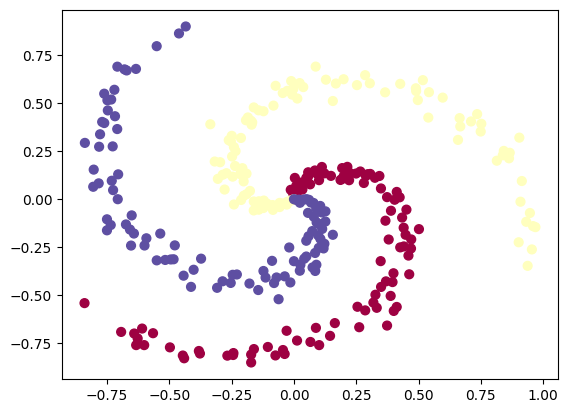

In [ ]:
# training data 생성
np.random.seed(seed=1)

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
# -------------------------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------------------------
## 데이터 전처리
X_tr = torch.FloatTensor(X) # n x 2 크기
y_tr = torch.LongTensor(y) # 정수형일때 long tensor로 바꿔줌
# model(X_tr) # n x 3 각 값은 스코어 값
# model(X_tr).size()

## 클래스 선언
class MyNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 3) # Output이 3!

    def forward(self, x):
        x = self.linear(x)
        return x

## 모형 선언
model = MyNet()

## optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

## 학습
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    ## F(x) 계산
    prediction = model(X_tr)

    ## cost 계산
    cost = F.cross_entropy(prediction, y_tr) # 스코어 값이 input으로 들어감. cross_entropy 내에 sigmoid 포함.

    ## Gradient descent
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    ## 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))
# -------------------------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------------------------

Epoch    0/1000 Cost: 1.107358
Epoch  100/1000 Cost: 0.904399
Epoch  200/1000 Cost: 0.833766
Epoch  300/1000 Cost: 0.800902
Epoch  400/1000 Cost: 0.783290
Epoch  500/1000 Cost: 0.772941
Epoch  600/1000 Cost: 0.766460
Epoch  700/1000 Cost: 0.762210
Epoch  800/1000 Cost: 0.759327
Epoch  900/1000 Cost: 0.757316
Epoch 1000/1000 Cost: 0.755885


Accuracy: 0.52


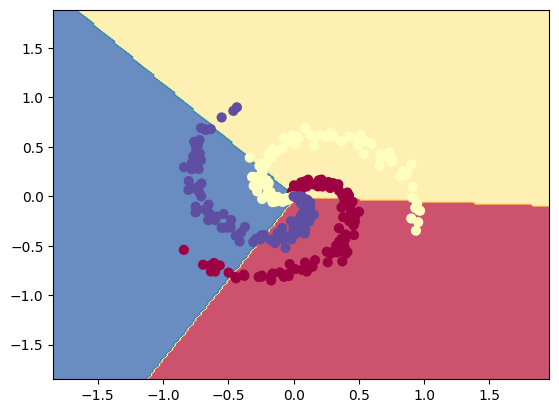

In [ ]:
# -------------------------------------------------------------------------------------------------------------------------
# training accuracy
scores     = model(X_tr)
prediction = torch.argmax(scores, dim=1)
accuracy   = (prediction == y_tr).float().mean()
print('Accuracy: %.2f' % (accuracy.item()))

# plot
W = list(model.parameters())[0].detach().numpy().transpose() # 차원 맞춰주기위해 전치
b = list(model.parameters())[1].detach().numpy()

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()
# ---------------

In [ ]:
W

array([[ 1.3005191,  1.5263572, -1.885952 ],
       [-2.2585824,  2.7302375, -0.2864567]], dtype=float32)

## 3) 소프트맥스 회귀로 MNIST 데이터 분류하기

- MNIST 데이터에 대해서 이해하고, 파이토치(PyTorch)로 소프트맥스 회귀를 구현하여 MNIST 데이터를 분류하는 실습을 진행해봅시다.

- MNIST 데이터는 아래의 링크에 공개되어져 있습니다. 링크 : http://yann.lecun.com/exdb/mnist

### 3-1) MNIST 데이터 이해하기

- MNIST는 숫자 0부터 9까지의 이미지로 구성된 손글씨 데이터셋입니다.
  + 이 데이터는 과거에 우체국에서 편지의 우편 번호를 인식하기 위해서 만들어진 훈련 데이터입니다.
  + 총 60,000개의 훈련 데이터와 레이블, 총 10,000개의 테스트 데이터와 레이블로 구성되어져 있습니다.
  + 레이블은 0부터 9까지 총 10개입니다.
  + 이 예제는 머신 러닝을 처음 배울 때 접하게 되는 가장 기본적인 예제이기도 합니다.

<img src='https://drive.google.com/uc?export=download&id=1JWNFPt6yQC1ayo6NEDvi57ON1zigmRGg' width="" height ="" /><br>

- MNIST 문제는 손글씨로 적힌 숫자 이미지가 들어오면, 그 이미지가 무슨 숫자인지 맞추는 문제입니다.
  + 예를 들어 숫자 5의 이미지가 입력으로 들어오면 이게 숫자 5다! 라는 것을 맞춰야 합니다.
  + 이 문제는 사람에게는 굉장히 간단하지만 기계에게는 그렇지가 않습니다.

- 우선 MNIST 문제를 더 자세히 보겠습니다. 각각의 이미지는 아래와 같이 28 픽셀 × 28 픽셀의 이미지입니다.

<img src='https://drive.google.com/uc?export=download&id=1_0_zGktKlgLQwqi3o022AC1UTGf06_nF' width="" height ="" /><br>

- 이 문제를 풀기 위해 여기서는 28 픽셀 × 28 픽셀 = 784 픽셀이므로, 각 이미지를 총 784의 원소를 가진 벡터로 만들어줄겁니다.
- 이렇게 되면 총 784개의 특성을 가진 샘플이 되는데, 이는 앞서 우리가 풀었던 그 어떤 문제들보다 특성이 굉장히 많은 샘플입니다.

<img src='https://drive.google.com/uc?export=download&id=1979Rt0YSwVTqmW3mU94FcymJVH5Bc-8T' width="" height ="" /><br>

- 784차원의 벡터로 만드는 코드를 미리보기로 보면 아래와 같습니다.

```
for X, Y in data_loader:
  # 입력 이미지를 [batch_size × 784]의 크기로 reshape
  # 레이블은 원-핫 인코딩
  X = X.view(-1, 28*28)
```

- 위의 코드에서 X는 for문에서 호출될 때는 (배치 크기 × 1 × 28 × 28)의 크기를 가지지만, `view`를 통해서 (배치 크기 × 784)의 크기로 변환됩니다.

### 3-2) 토치비전(torchvision)

- torchvision은 유명한 데이터셋들, 이미 구현되어져 있는 유명한 모델들, 일반적인 이미지 전처리 도구들을 포함하고 있는 패키지입니다.
- 아래의 링크는 torchvision에 어떤 데이터셋들(datasets)과 모델들(models) 그리고 어떤 전처리 방법들(transforms)을 제공하고 있는지 보여줍니다.

링크 : https://pytorch.org/docs/stable/torchvision/index.html

- 참고로 자연어 처리를 위해서는 토치텍스트(torchtext)라는 패키지가 있습니다.

### 3-3) 분류기 구현을 위한 사전 설정

- 우선 필요한 도구들을 임포트합니다.

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

- 현재 환경에서 GPU 연산이 가능하다면 GPU 연산을 하고, 그렇지 않다면 CPU 연산을 하도록 합니다.

In [ ]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cpu


- 구글의 Colab에서 '런타임 > 런타임 유형 변경 > 하드웨어 가속기 > GPU'를 선택하면 USE_CUDA의 값이 True가 되면서 '다음 기기로 학습합니다: cuda'라는 출력이 나옵니다. 즉, GPU로 연산하겠다는 의미입니다.
- 반면에 '하드웨어 가속기 > None'을 선택하면 USE_CUDA의 값이 False가 되면서 '다음 기기로 학습합니다: cpu'라는 출력이 나옵니다. 즉, CPU로 연산하겠다는 의미입니다.

- 랜덤 시드를 고정합니다.

In [ ]:
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

- 하이퍼파라미터를 변수로 둡니다.

In [ ]:
# hyperparameters
training_epochs = 15
batch_size = 100
# trainins sample size : 60000
# 1 epoch : 600 iteration
# 15 epoch : 600 x 15

### 3-4) MNIST 분류기 구현하기

- `torchvision.datasets.dsets.MNIST`를 사용하여 MNIST 데이터셋을 불러올 수 있습니다.

In [ ]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 57.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 28.6MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 57.4MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.35MB/s]


- 첫번째 인자 root는 MNIST 데이터를 다운로드 받을 경로입니다.
- 두번째 인자 train은 인자로 True를 주면, MNIST의 훈련 데이터를 리턴받으며 False를 주면 테스트 데이터를 리턴받습니다.
- 세번째 인자 transform은 현재 데이터를 파이토치 텐서로 변환해줍니다.
- 네번째 인자 download는 해당 경로에 MNIST 데이터가 없다면 다운로드 받겠다는 의미입니다.

- 본격적인 데이터 분석에 앞서서 데이터가 어떤 형태인지 확인해보도록 하겠습니다.

In [ ]:
''' 데이터 확인하기 (1) '''
for (X_train, y_train) in mnist_train:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    break

# len(mnist_train) ## 60000 : training data 개수
# mnist_train[0][0] : 첫번째 training data의 x - 1 x 28 x 28
# mnist_train[0][1] : 첫번째 training data의 y - integer (정수 인코딩)

X_train: torch.Size([1, 28, 28]) type: torch.FloatTensor


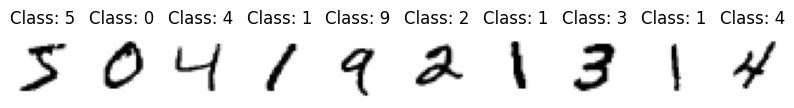

In [ ]:
''' 데이터 확인하기 (2) '''
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
i = 0
for (X_train, y_train) in mnist_train:
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(X_train.numpy().reshape(28, 28), cmap = "gray_r")
    plt.title('Class: ' + str(y_train))
    i += 1
    if(i >= 10): break

- 이렇게 데이터를 다운로드했다면 앞서 미니 배치와 데이터로드 챕터에서 학습했던 데이터로더(DataLoader)를 사용합니다.

In [ ]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size, # 배치 크기는 100
                         shuffle=True,
                         drop_last=True)

- 이때 DataLoader에는 4개의 인자가 있습니다.
  + 첫번째 인자인 `dataset`은 로드할 대상을 의미하며,
  + 두번째 인자인 `batch_size`는 배치 크기,
  + `shuffle`은 매 에포크마다 미니 배치를 셔플할 것인지의 여부,
  + `drop_last`는 마지막 배치를 버릴 것인지를 의미합니다.

- drop_last를 하는 이유를 이해하기 위해서 1,000개의 데이터가 있다고 했을 때, 배치 크기가 128이라고 해봅시다. 1,000을 128로 나누면 총 7개가 나오고 나머지로 104개가 남습니다. 이때 104개를 마지막 배치로 한다고 하였을 때 128개를 충족하지 못하였으므로 104개를 그냥 버릴 수도 있습니다. 이때 마지막 배치를 버리려면 drop_last=True를 해주면 됩니다. 이는 다른 미니 배치보다 개수가 적은 마지막 배치를 경사 하강법에 사용하여 마지막 배치가 상대적으로 과대 평가되는 현상을 막아줍니다.

- 이제 모델을 설계합니다. input_dim은 784이고, output_dim은 10입니다.

In [ ]:
# MNIST data image of shape 28 * 28 = 784
linear = nn.Linear(784, 10, bias=True).to(device)

- to() 함수는 연산을 어디서 수행할지를 정합니다.
  + to() 함수는 모델의 매개변수를 지정한 장치의 메모리로 보냅니다.
  + CPU를 사용할 경우에는 필요가 없지만, GPU를 사용하려면 to('cuda')를 해 줄 필요가 있습니다.
  + 아무것도 지정하지 않은 경우에는 CPU 연산이라고 보면 됩니다.

- bias는 편향 b를 사용할 것인지를 나타냅니다.
  + 기본값은 True이므로 굳이 할 필요는 없지만 명시적으로 True를 해주었습니다.

- 이제 비용 함수와 옵티마이저를 정의합니다
  + 앞서 소프트맥스 회귀를 배울 때는 `torch.nn.functional.cross_entropy()`를 사용하였으나 여기서는 `torch.nn.CrossEntropyLoss()`을 사용하고 있습니다.
  + 둘 다 파이토치에서 제공하는 크로스 엔트로피 함수로 둘 다 소프트맥스 함수를 포함하고 있습니다.

In [ ]:
# 비용 함수 정의
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음.
## (1) nn.CrossEntropyLoss(X,y).to(device)
## (2) criterion(X,y)
### --> (1)과 (2)는 같은 의미

# 옵티마이저 정의
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [ ]:
for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 지정함.
    avg_cost = 0
    total_batch = len(data_loader) # 60000개 훈련데이터, 100개 미니배치, len(data_loader) == 600

    for X, Y in data_loader: #
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)

        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)

        # F(X) 계산
        hypothesis = linear(X)

        # cost 계산
        cost = criterion(hypothesis, Y) # 앞서 지정한 비용함수

        # optimizer
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch # 배치별 loss의 평균을 avg_cost에 더함

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535701573
Epoch: 0002 cost = 0.359403193
Epoch: 0003 cost = 0.331129968
Epoch: 0004 cost = 0.316610843
Epoch: 0005 cost = 0.307287782
Epoch: 0006 cost = 0.300151169
Epoch: 0007 cost = 0.295128852
Epoch: 0008 cost = 0.290526181
Epoch: 0009 cost = 0.287431419
Epoch: 0010 cost = 0.284428835
Epoch: 0011 cost = 0.281726062
Epoch: 0012 cost = 0.279582143
Epoch: 0013 cost = 0.277621895
Epoch: 0014 cost = 0.275999963
Epoch: 0015 cost = 0.274319828
Learning finished


Accuracy: 0.8833000063896179
Label:  8
Prediction:  8


/usr/local/lib/python3.11/dist-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.11/dist-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


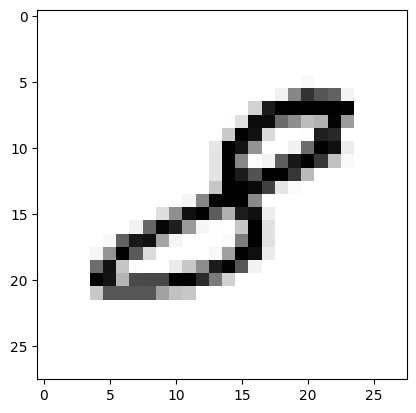

In [ ]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad():
    # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    # 이는 모델을 테스트할 때 필요 없는 기울기 계산을 방지하여 메모리와 연산 효율을 높입니다.

    # test 데이터
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device) # minist_test[0][0] : x data
    Y_test = mnist_test.test_labels.to(device) # mnist_test[0][1]와 같음.

    # F(X) 계산
    prediction = linear(X_test)

    # 범주 예측 (score가 가장 높은 범주를 선택) 하고 실제 test data의 y와 비교
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()